# Chap. 4

***
## Chap. 4-1

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

***
## Chap. 4-2

### 4-2-1

In [2]:
dice_data = np.arange(1,7)
dice_data

array([1, 2, 3, 4, 5, 6])

#### 4-2-1-1

In [3]:
print(f'１つだけランダムに抽出：{np.random.choice(dice_data, 1)}')

１つだけランダムに抽出：[5]


### 4-2-2

In [4]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)  # clc_step回振った出た目のndarray
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(f'{i} が出る確率：{p}')

1 が出る確率：0.171
2 が出る確率：0.158
3 が出る確率：0.157
4 が出る確率：0.183
5 が出る確率：0.16
6 が出る確率：0.171


***
### Practice 4-1

In [5]:
calc_steps = 1000
coin_data = np.array([0, 1])
coin_toss = np.random.choice(coin_data, calc_steps)
print(f'表の確率：{len(coin_toss[coin_toss == 0]) / calc_steps}')
print(f'表の確率：{len(coin_toss[coin_toss == 1]) / calc_steps}')

表の確率：0.488
表の確率：0.512


***
### Practice 4-2

In [6]:
100/1000 * 99/999

0.010

***
### Practice 4-3

In [7]:
p_X = 0.001
p_plus_X = 0.99
p_plus_Y = 0.03

In [8]:
P = p_X*p_plus_X / (p_plus_X*p_X + p_plus_Y*(1-p_X))
P

0.032

***
## Chap. 4-3

### 4-3-2

#### 4-3-2-1

In [9]:
calc_steps = 1000
dice_data = np.arange(1,7)
dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = []
for i in range(1, 7):
     prob_data.append(len(dice_rolls[dice_rolls==i])/calc_steps)
prob_data = np.array(prob_data)
print(prob_data)

[0.144 0.166 0.171 0.191 0.155 0.173]


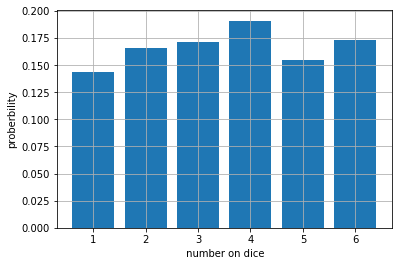

In [10]:
plt.bar(dice_data, prob_data)
plt.xlabel(' number on dice')
plt.ylabel('proberbility')
plt.grid()

#### 4-3-2-2

In [11]:
nrandlist = np.random.randn(1000)
sigma = np.std(nrandlist)
prob_be_data = []
for i in nrandlist:
    if -sigma <= i <= sigma:
        prob_be_data.append(1)
    else:
        prob_be_data.append(0)
prob_be_data = np.array(prob_be_data)
p = np.sum(prob_be_data) / len(prob_be_data)
p_c = 1 - p
print(f'1が出る確率：{p}')
print(f'0が出る確率：{p_c}')

1が出る確率：0.676
0が出る確率：0.32399999999999995


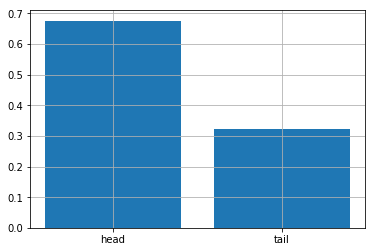

In [12]:
plt.bar([0, 1], [p, p_c])
plt.xticks([0, 1], ['head', 'tail'])
plt.grid()

#### 4-3-2-4

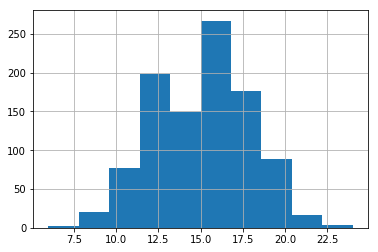

In [13]:
np.random.seed(0)
x1 = np.random.binomial(30, 1/2, 1000)
plt.hist(x1)
plt.grid()

#### 4-3-4-5

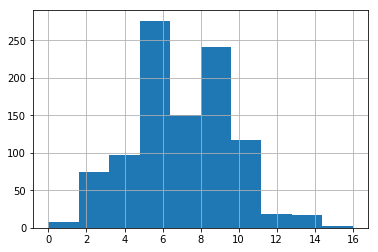

In [14]:
x2 = np.random.poisson(7, 1000)
plt.hist(x2)
plt.grid()

#### 4-3-4-6

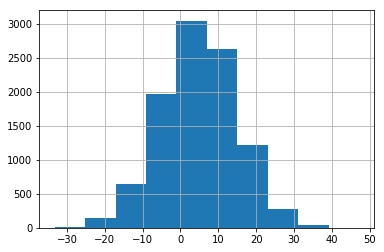

In [15]:
x3 = np.random.normal(5, 10, 10000)
plt.hist(x3)
plt.grid()

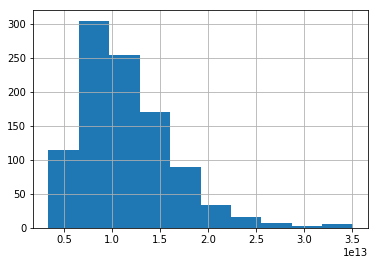

In [16]:
x4 = np.random.lognormal(30, 0.4, 1000)
plt.hist(x4)
plt.grid()

### 4-3-3

In [17]:
df1 = pd.read_csv('../chap3/student-mat.csv', sep=';')

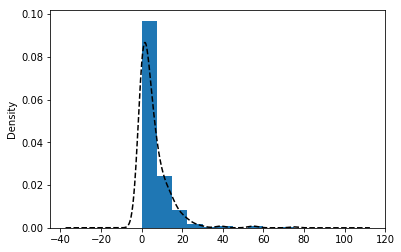

In [18]:
df1['absences'].plot(kind='kde', style='k--')
df1['absences'].hist(density=True)
plt.grid()

***
### Practice 4-4

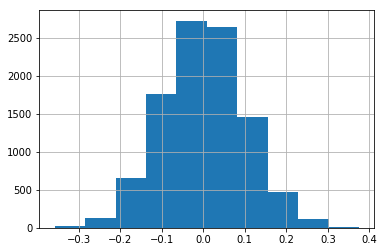

In [19]:
x5 = []
for _ in range(10000):
    mu = np.mean(np.random.normal(0, 1, 100))
    x5.append(mu)
plt.hist(x5)
plt.grid()

### Practice 4-5

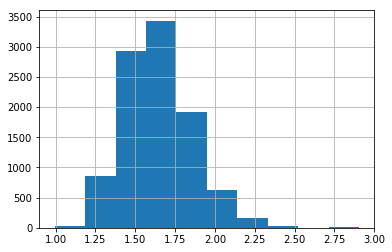

In [20]:
x6 = []
for _ in range(10000):
    mu = np.mean(np.random.lognormal(0, 1, 100))
    x6.append(mu)
plt.hist(x6)
plt.grid()

### Practice 4-6

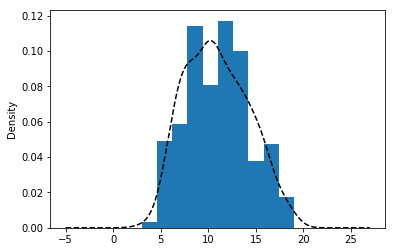

In [21]:
df1['G1'].plot(kind='kde', style='k--')
df1['G1'].hist(density=True)
plt.grid()

***
## Chap. 4-4

4-4-3-1

In [22]:
import scipy.stats as stats
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [23]:
x, y = np.mgrid[10:100:2, 10:100:2]
print(x, y)
print(x.shape)

[[10 10 10 ... 10 10 10]
 [12 12 12 ... 12 12 12]
 [14 14 14 ... 14 14 14]
 ...
 [94 94 94 ... 94 94 94]
 [96 96 96 ... 96 96 96]
 [98 98 98 ... 98 98 98]] [[10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 ...
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]]
(45, 45)


In [24]:
pos = np.empty(x.shape + (2,))

In [25]:
pos[:, :, 0] = x
pos[:, :, 1] = y

In [26]:
rv = multivariate_normal([50, 50],
                         [[100, 0], 
                          [0, 100]])
z = rv.pdf(pos)

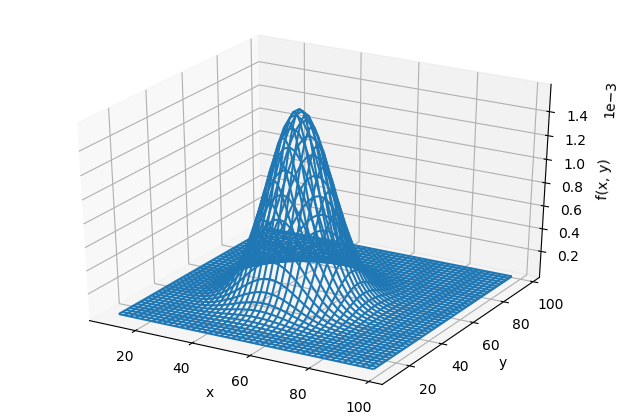

In [27]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

***
## Chap. 4-5

### 4-5-1

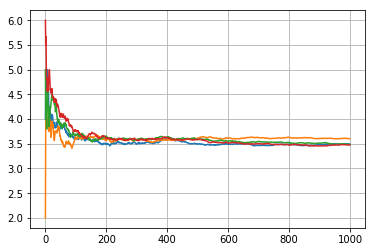

In [33]:
calc_times = 1000
sample_array = np.arange(1,7)
number_cnt = np.arange(1, calc_times+1)

for _ in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
plt.grid()

### 4-5-2

In [36]:
def function_central_theory(N):
    
    sample_arr = np.arange(1,7)
    number_cnt = np.arange(1, N+1)
    mean_arr = np.array([])
    
    for _ in range(1000):
        cum_variables = np.random.choice(sample_arr, N).cumsum()
        mean_arr = np.append(mean_arr, cum_variables[N-1]/N)
        
    plt.hist(mean_arr)
    plt.grid()

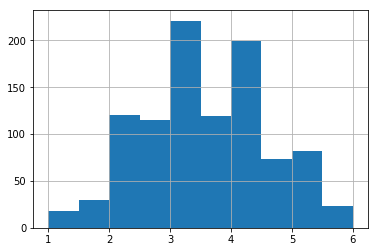

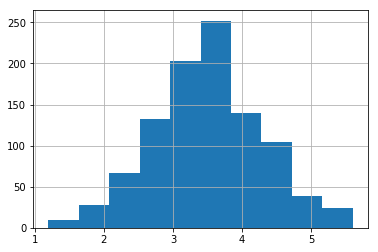

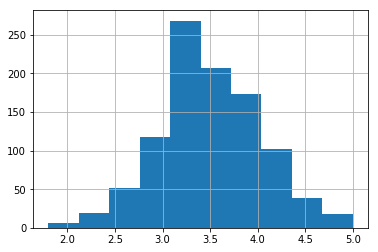

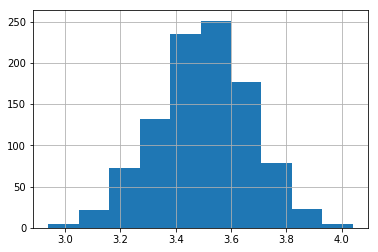

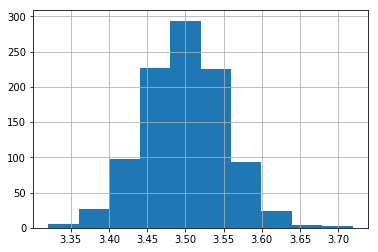

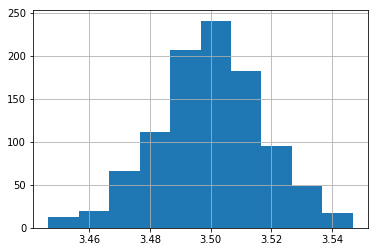

In [44]:
for N in [3, 5, 10, 100, 1000, 10000]:
    function_central_theory(N)
    plt.show()

### 4-5-3

#### 4-5-3-1

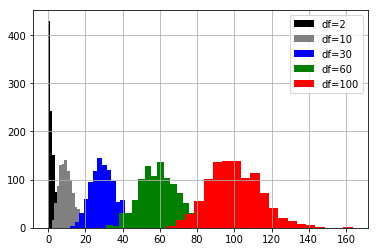

In [52]:
for df, c in zip([2, 10, 30, 60, 100], ['black', 'gray', 'blue', 'green', 'red']):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, bins=20, color=c)
plt.legend(['df=2','df=10','df=30','df=60','df=100'])
plt.grid()

#### 2-5-3-2

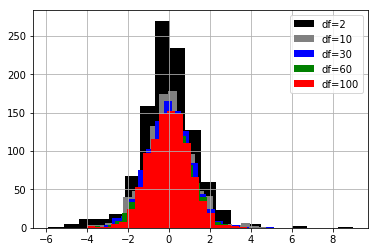

In [82]:
for df, c in zip([5, 10, 30, 60, 100], ['black', 'gray', 'blue', 'green', 'red']):
    x = np.random.standard_t(df, 1000)
    plt.hist(x, bins=20, color=c)
plt.legend(['df=2','df=10','df=30','df=60','df=100'])
plt.grid()

#### 2-5-3-3

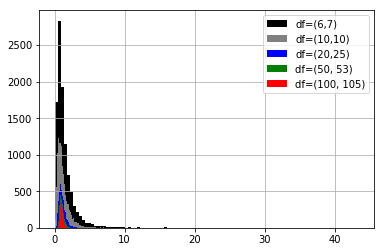

In [81]:
for df, c in zip([(6,7), (10,10), (20,25), (50, 53), (100, 105)], ['black', 'gray', 'blue', 'green', 'red']):
    x = np.random.f(df[0], df[1], 10000)
    plt.hist(x, bins=100, color=c)
plt.legend(['df=(6,7)','df=(10,10)','df=(20,25)','df=(50, 53)','df=(100, 105)'])
plt.grid()

***
### Practice 4-6

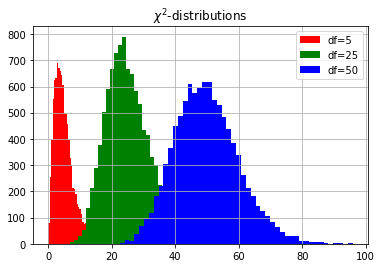

In [86]:
for df, c in zip([5, 25, 50], 'rgb'):
    x = np.random.chisquare(df, 10000)
    plt.hist(x, bins=50, color=c)
plt.title(f'$\chi^2$-distributions')
plt.legend(['df=5','df=25','df=50'])
plt.grid()

***
### Practice 4-7

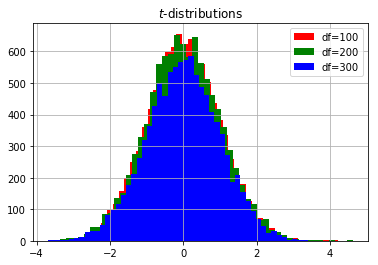

In [84]:
for df, c in zip([100, 200, 300], 'rgb'):
    x = np.random.standard_t(df, 10000)
    plt.hist(x, bins=50, color=c)
    plt.legend(['df=100','df=200','df=300'])
plt.title(f'$t$-distributions')
plt.grid()

***
### Practice 4-9

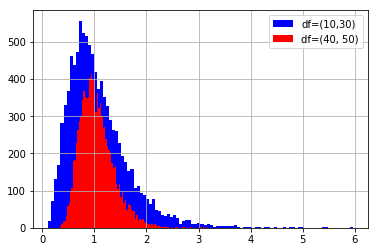

In [96]:
for df, c in zip([(10,30), (40,50)], ['blue', 'red']):
    x = np.random.f(df[0], df[1], 10000)
    plt.hist(x, bins=100, color=c)
plt.legend(['df=(10,30)','df=(40, 50)'])
plt.grid()

***
## Chap. 4-6

***
### Practice 4-11

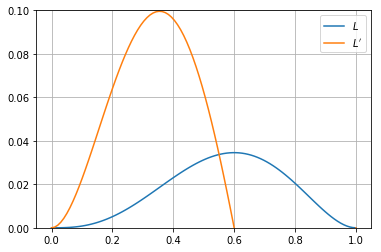

In [120]:
L = lambda x: x**3 * (1-x)**2
L_prime = lambda x: x**2 * (1-x) * (3-5*x)

x = np.linspace(0, 1, 100)
plt.plot(x, L(x))
plt.plot(x, L_prime(x))
plt.ylim([0 ,0.1])
plt.legend([f'$L$', f'$L\'$'])
plt.grid()

***
## Chap. 4-7

In [122]:
df2 = pd.read_csv('../chap3/student-por.csv', sep=';')

student_data_merge = pd.merge(df1, df2,
                     on=['school','sex','age','address','famsize','Pstatus','Medu',
                         'Fedu','Mjob','Fjob','reason','nursery','internet'],
                     suffixes=['_math','_por'])
student_data_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [124]:
print(f'G1数学の成績平均: {student_data_merge["G1_math"].mean()}')
print(f'G1ポルトガル語の成績平均: {student_data_merge["G1_por"].mean()}')

G1数学の成績平均: 10.861256544502618
G1ポルトガル語の成績平均: 12.112565445026178


### 4-7-1

In [125]:
stats.ttest_rel(student_data_merge["G1_math"], student_data_merge["G1_por"])

Ttest_relResult(statistic=-8.632744457286481, pvalue=1.6536555217100788e-16)

> 両群はペアになっているので，`stats.ttest_rel`関数を使わなければならない。

***
### Practice 4-13

In [127]:
stats.ttest_rel(student_data_merge["G2_math"], student_data_merge["G2_por"])

Ttest_relResult(statistic=-9.431186078657428, pvalue=4.0622824801348043e-19)

> 差がある。

In [128]:
stats.ttest_rel(student_data_merge["G3_math"], student_data_merge["G3_por"])

Ttest_relResult(statistic=-9.977077139661143, pvalue=5.561492113688385e-21)

> 差がある。